In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# Input per-locus info
LOCFILE = "/storage/ileena/ssc-gangstr-denovos/denovos_GW_priors_Jan20/combined/SSC_allphases_011720_denovos_GW_priors_Jan20.locus_stats.tab"

# Make editable in Illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Imports
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats

# Other data paths
ANNOTFILE = "/storage/mgymrek/ssc-denovos/annotations/hg38_gangstr_MasterAnnotation-rmdup.bed"
CODISFILE = "/storage/mgymrek/workspace/ssc-denovos/metadata/codis_hg38.csv"
NISTFILE = "/storage/ileena/denovos4/annotations/nist_codis_info.txt"
MUTEAFILE = "/storage/mgymrek/ssc-denovos/mutea/MUTEA_MutationRates_hg38_GangSTR.bed"

# Color keys
colors = ['gray','red','gold','blue','green','purple','brown','salmon','magenta','cyan','darkblue']

# Output path info
OUTDIR = "pdfs/"

In [7]:
# Load per-locus mutation info
data = pd.read_csv(LOCFILE, delim_whitespace=True)

# Load annotation info
annot = pd.read_csv(ANNOTFILE, sep="\t")

# Set up fields
def GetChrom(x):
    if "chr" in str(x): return int(x[3:])
    else: return int(x)
data["chrom"] = data["chrom"].apply(GetChrom)
annot = annot[annot["chrom"].apply(lambda x: x not in ["X","chrX","Y","chrY"])]
annot["chrom"] = annot["chrom"].apply(GetChrom)
annot["pos"] = annot["start"]

# Merge
adata = pd.merge(data, annot[["chrom","pos","end","period","motif"]], on=["chrom","pos"])

[1.419279662194714e-05, 0.00011391470858368873, 0.00032188095216703123, 0.0006298399169773667, 0.001038612135522939]
[2.4077347701607876e-05, 0.00035079554858498727, 0.0010752885255717053, 0.0014603305501151083, 0.0012769761205465458]
[9.52841898961285e-06, 7.769554290216563e-05, 0.0005407577916620995, 0.0009247921634336535, 0.001318217769575534]


/storage/BonnieH/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars


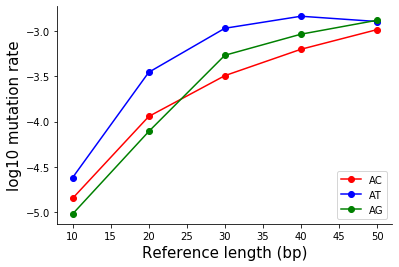

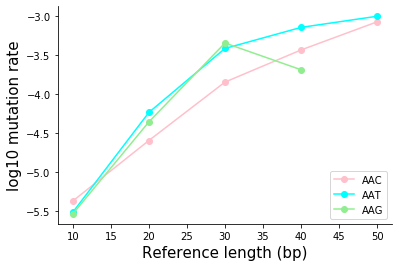

In [8]:
adata["reflen"] = adata["end"]-adata["pos"]+1
lenbins = np.arange(10, 61, 10)


mcolors = {
    "AC": "red",
    "AT": "blue",
    "AG": "green",
    "AAC": "pink",
    "AAT": "cyan",
    "AAG": "lightgreen"
}

#for period in range(1, 7):
fig = plt.figure()
ax = fig.add_subplot(111)

for motif in ["AC","AT","AG"]:
    muts = []
    for i in range(len(lenbins)-1):
        lb = lenbins[i]
        ub = lenbins[i+1]
        x = adata[(adata["motif"]==motif) & (adata["reflen"]>=lb) & (adata["reflen"]<ub)]
        muts.append(sum(x["mut_unaff"])*1.0/sum(x["all_unaff"]))
    ax.plot(lenbins[:-1], np.log10(muts), color=mcolors[motif], label=motif, marker="o")
    print(muts)
ax.set_xlabel("Reference length (bp)", size=15);
ax.set_ylabel("log10 mutation rate", size=15);
ax.legend(loc="lower right")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom');

fig = plt.figure()
ax = fig.add_subplot(111)

for motif in ["AAC","AAT","AAG"]:
    muts = []
    for i in range(len(lenbins)-1):
        lb = lenbins[i]
        ub = lenbins[i+1]
        x = adata[(adata["motif"]==motif) & (adata["reflen"]>=lb) & (adata["reflen"]<ub)]
        muts.append(sum(x["mut_unaff"])*1.0/sum(x["all_unaff"]))
    ax.plot(lenbins[:-1], np.log10(muts), color=mcolors[motif], label=motif, marker="o")
ax.set_xlabel("Reference length (bp)", size=15);
ax.set_ylabel("log10 mutation rate", size=15);
ax.legend(loc="lower right")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom');